<a href="https://colab.research.google.com/github/zehrahayirci/instagram_t-SNE/blob/master/insta_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello! In this Colab, we mplement t-SNE algorithm for color histagram and ImageNet classes of Instagram posts

*   List item
*   List item



In [0]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import glob
import pickle
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist

First, we download photos from instagram by [instaloader](https://pypi.org/project/instaloader/)



---



In [0]:
!pip install instaloader
profilename = 'tokyoda100gun' #that's me!

  Created wheel for instaloader: filename=instaloader-4.2.8-cp36-none-any.whl size=40667 sha256=b6ff678de7402151f88774d7e6cabee1ba4111e5e62bada1c522acd42a743eac
  Stored in directory: /root/.cache/pip/wheels/43/da/98/3e3105f88188f563769f69d20d4444080716097b57fb118964
Successfully built instaloader


We will get all photos of one user with
`instaloader profile [profile ...]`

Keep in mind that, this colab works best for 100+ posts to create 10x10 grid image


In [0]:
!instaloader profile tokyoda100gun 

Stored ID 8716249509 for profile tokyoda100gun.
tokyoda100gun/2019-04-07_15-16-51_UTC_profile_pic.jpg 
Retrieving posts from profile tokyoda100gun.
[  1/300] tokyoda100gun/2019-07-30_19-42-18_UTC.jpg [toykoda300renk #tokyo] json 
[  2/300] tokyoda100gun/2019-07-27_19-27-40_UTC.jpg [Munih'te 22.ay donumumu #neus…] json 
[  3/300] tokyoda100gun/2019-07-24_16-54-50_UTC.jpg [Çok sıcak çok sıcak çok sıcak…] json 
[  4/300] tokyoda100gun/2019-07-21_10-10-28_UTC.jpg [🥁] json 
[  5/300] tokyoda100gun/2019-07-20_21-58-06_UTC.jpg [🎆🎇✨ #munich #münchen #olympia…] tokyoda100gun/2019-07-20_21-58-06_UTC.mp4 json 
[  6/300] tokyoda100gun/2019-07-16_19-51-55_UTC_1.jpg tokyoda100gun/2019-07-16_19-51-55_UTC_2.jpg tokyoda100gun/2019-07-16_19-51-55_UTC_3.jpg tokyoda100gun/2019-07-16_19-51-55_UTC_4.jpg tokyoda100gun/2019-07-16_19-51-55_UTC_5.jpg [Bu kafe de çizgi filmlere tat…] json 
[  7/300] tokyoda100gun/2019-07-15_16-08-53_UTC.jpg [*Aslında hasta yatıyor* #toky…] json 
[  8/300] tokyoda100gun/2019-07-1

If your profile is more than 100, or you want to add/discard manually you can use the Files bar on the left and locate your profile name. 
I want to use resized images. 


In [0]:

instagram_files = "/content/" + profilename + "/*.jpg"
resize_files = "/content/" + profilename +"/"
for f,insta_file in enumerate(glob.glob(instagram_files)):
    image = Image.open(insta_file)
    resized_img =  image.resize((100,100), Image.ANTIALIAS)

    #resized_img = Image.fromarray(resized_img)
    outfile = resize_files + insta_file
    print(resize_files+str(f)+'.png')
    resized_img.save(resize_files+str(f)+'.png', 'png', quality=80)
    if f > 98:
      break
    


/content/tokyoda100gun/0.png
/content/tokyoda100gun/1.png
/content/tokyoda100gun/2.png
/content/tokyoda100gun/3.png
/content/tokyoda100gun/4.png
/content/tokyoda100gun/5.png
/content/tokyoda100gun/6.png
/content/tokyoda100gun/7.png
/content/tokyoda100gun/8.png
/content/tokyoda100gun/9.png
/content/tokyoda100gun/10.png
/content/tokyoda100gun/11.png
/content/tokyoda100gun/12.png
/content/tokyoda100gun/13.png
/content/tokyoda100gun/14.png
/content/tokyoda100gun/15.png
/content/tokyoda100gun/16.png
/content/tokyoda100gun/17.png
/content/tokyoda100gun/18.png
/content/tokyoda100gun/19.png
/content/tokyoda100gun/20.png
/content/tokyoda100gun/21.png
/content/tokyoda100gun/22.png
/content/tokyoda100gun/23.png
/content/tokyoda100gun/24.png
/content/tokyoda100gun/25.png
/content/tokyoda100gun/26.png
/content/tokyoda100gun/27.png
/content/tokyoda100gun/28.png
/content/tokyoda100gun/29.png
/content/tokyoda100gun/30.png
/content/tokyoda100gun/31.png
/content/tokyoda100gun/32.png
/content/tokyoda100g

First, we create histograms of the posts. Sorry for all b&w posts!

In [0]:
resize_files = "/content/" + profilename +"/*.png"
color = ('b','g','r')
files = [resize_files]
hist = {}
index = 0 
for filem in files:
	hist[filem]={}
	for filename in glob.glob(filem):
		hist[filem][filename]={}
		#print(filename)
		for i,col in enumerate(color):
			im=Image.open(filename)
			image_data = np.asarray(im)
			if len(image_data.shape) == 2 :
				image_data = cv.cvtColor(image_data,cv.COLOR_GRAY2RGB)
			index = index +1
			hist[filem][filename][col] = cv.calcHist([image_data],[i],None,[256],[0,256])

with open('insta_histogram.pickle', 'wb') as f:
	pickle.dump(hist, f)
print(index) #this should return 3 x your post count 


300


Create a list of all histogram of all images. 
I set perplexity to 25, but you can play it as you want

In [0]:
with open('insta_histogram.pickle', 'rb') as f:
	data = pickle.load(f)
hist = np.zeros((100,768))
filenames = []
for fil, filem in enumerate(data): #1
	for fn,filename in enumerate(data[filem]): #400
		hist[fn,0:256] = data[filem][filename]['b'][:,0] #256
		hist[fn,256:512] = data[filem][filename]['g'][:,0] #256
		hist[fn,512:768] = data[filem][filename]['r'][:,0] #256
		filenames.append((filem,filename))

		
tsne = TSNE(perplexity=25, n_components=2, init='random', n_iter=5000)
X_2d = tsne.fit_transform(np.array(hist))
X_2d -= X_2d.min(axis=0)
X_2d /= X_2d.max(axis=0)

with open('tsne.pickle', 'wb') as f:
	pickle.dump({'tsne':X_2d,'name':filenames}, f)

We need lapjv to create a nice grid from t-SNE results

In [0]:
!pip install lapjv
from lapjv import lapjv

  Created wheel for lapjv: filename=lapjv-1.3.1-cp36-cp36m-linux_x86_64.whl size=83727 sha256=5a164c9a6737b32e6a0573ff1c3099ed38107b0d685588f49920c28f000fec83
  Stored in directory: /root/.cache/pip/wheels/6e/fe/fd/b700bd67e00bcd65241d55d875eec17892a86ca6a4deef9515
Successfully built lapjv


In [0]:
grid = np.dstack(np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))).reshape(-1, 2)
cost_matrix = cdist(grid, X_2d, "sqeuclidean").astype(np.float32)
out_res = 120

In [0]:
cost_matrix = cost_matrix * (100000 / cost_matrix.max())
row_asses, col_asses, _ = lapjv(cost_matrix)
grid_jv = grid[col_asses]

In [0]:
out = np.ones((10*out_res, 10*out_res, 3))

for i in range(100):
	coordinate_X =  int(np.floor(grid_jv[i,1]*9*out_res))
	coordinate_Y =  int(np.floor(grid_jv[i,0]*9*out_res))

	im=Image.open(filenames[i][1]).convert('RGB').resize((120,120))
	image_data = np.asarray(im)
	out[coordinate_Y:coordinate_Y + out_res, coordinate_X:coordinate_X + out_res]  = image_data


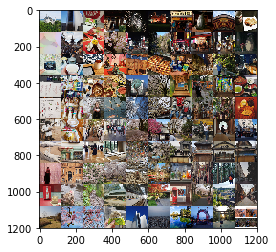

In [0]:
im = Image.fromarray(out.astype(np.uint8))
im.save("insta_histogram.png")
plt.imshow(im)

Perfect! now, we can continue to ImageNet classes and create another cost funtion.

I use Resnet for it 

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
resnet18.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

I don't want to results for Imagenet, instead, I will use the last features.

I discard the last activation step from the network.

Please enable GPU from Edit -> Notebook Settings -> Hardware

In [0]:
import torch.nn as nn
modus=list(resnet18.children())[:-1]
resnet18_feature=nn.Sequential(*modus)
resnet18_feature.cuda()
for p in resnet18_feature.parameters():
  p.requires_grad = False

Again we will use 100 images. Go to the link below and allw Google Drive acces by copy paste the code.

In [0]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')
files = [resize_files]
features = {}
features[folder] = {}
for filem in files:
  for img in  glob.glob(filem):

    insta_image = Image.open(img)
    print(img)
    img_t = transform(insta_image)
    batch_t = torch.unsqueeze(img_t, 0)

    out_feature = resnet18_feature(batch_t.cuda())
    out_feature = out_feature.view(512)
    features[folder][img] = out_feature.cpu().detach().numpy().reshape(512)

    



Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/tokyoda100gun/84.png
/content/tokyoda100gun/25.png
/content/tokyoda100gun/58.png
/content/tokyoda100gun/77.png
/content/tokyoda100gun/49.png
/content/tokyoda100gun/34.png
/content/tokyoda100gun/43.png
/content/tokyoda100gun/3.png
/content/tokyoda100gun/96.png
/content/tokyoda100gun/51.png
/content/tokyoda100gun/45.png
/content/tokyoda100gun/46.png
/content/tokyoda100gun/64.png
/content/tokyoda100gun/57.png
/content/tokyoda100gun/90.png
/content/tokyoda100gun/2.png
/content/tokyoda100gun/50.png
/content/tokyoda100gun/95.png
/content/tokyoda100gun/59.png
/content/tokyoda100gun/47.png
/content/tokyoda100gun/7.png
/content/tokyoda100gun/79.png
/content/tokyoda100gun/73.png
/content/tokyoda100gun/97.png
/content/tokyoda100gun/67.png
/content/tokyoda100gun/39.png
/content/tokyoda100gun/69.png
/content/tokyoda100gun/14.png
/content/tokyoda100gun/86.png


In [0]:
features = {}
features[folder] = {}
print(all_images)
for filem in all_images:
  for img in  glob.glob(filem):

    insta_image = Image.open(img)
    #If your images include b&w, convert to RGB format uncomment below
    #insta_image = Image.open(insta_image).convert('RGB')

    img_t = transform(insta_image)
    batch_t = torch.unsqueeze(img_t, 0)

    #hangi_class = np.argmax(out_class.cpu().detach().numpy())
    #print(hangi_class)
    #plt.plot(out.cpu().detach().numpy().reshape(1000))
    out_feature = resnet18_feature(batch_t.cuda())
    out_feature = out_feature.view(512)
    features[img] = out_feature.cpu().detach().numpy().reshape(512)
    #plt.plot(out.cpu().detach().numpy().reshape(512))
    

['/content/tokyoda100gun/*.png']


In [0]:
with open('features.pickle', 'wb') as f:
	pickle.dump(features, f)
  #features.keys()

IndentationError: ignored

Now we have all feature in the pickle file, we can visualize them just like histogram.

In [0]:
with open('features.pickle', 'rb') as g:
	features = pickle.load(g)
  
feat = np.zeros((100,512))

for fil, filem in enumerate(features): #1
  for fn,filename in enumerate(features[filem]):
    feat[fil]=features[filem][filename]


In [0]:

tsne = TSNE(perplexity=25, n_components=2, init='random', n_iter=5000)
X_2d = tsne.fit_transform(np.array(feat))
X_2d -= X_2d.min(axis=0)
X_2d /= X_2d.max(axis=0)
with open('tsne_features.pickle', 'wb') as f:
	pickle.dump({'tsne':X_2d,'name':filenames}, f)


grid = np.dstack(np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))).reshape(-1, 2)
cost_matrix = cdist(grid, X_2d, "sqeuclidean").astype(np.float32)
out_res = 120
   
cost_matrix = cost_matrix * (100000 / cost_matrix.max())
row_asses, col_asses, _ = lapjv(cost_matrix)
grid_jv = grid[col_asses]

with open('grid_jv.pickle', 'wb') as f:
	pickle.dump({'tsne':X_2d,'name':filenames,'grid_jv':grid_jv}, f)

out = np.ones((10*out_res, 10*out_res, 3))

for i in range(100):
	coordinate_X =  int(np.floor(grid_jv[i,1]*9*out_res))
	coordinate_Y =  int(np.floor(grid_jv[i,0]*9*out_res))

	im=Image.open(filenames[i][1]).convert('RGB').resize((120,120))
	image_data = np.asarray(im)
	out[coordinate_Y:coordinate_Y + out_res, coordinate_X:coordinate_X + out_res]  = image_data
im = Image.fromarray(out.astype(np.uint8))
im.save("tsne_features.png")
plt.imshow(im)